In [37]:
#importing dependencies

In [ ]:
!pip install seaborn

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [39]:
#importing csv file

In [40]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [41]:
#plotting histograms

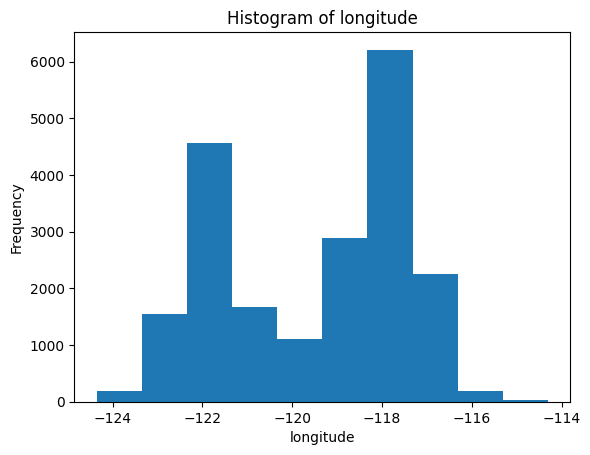

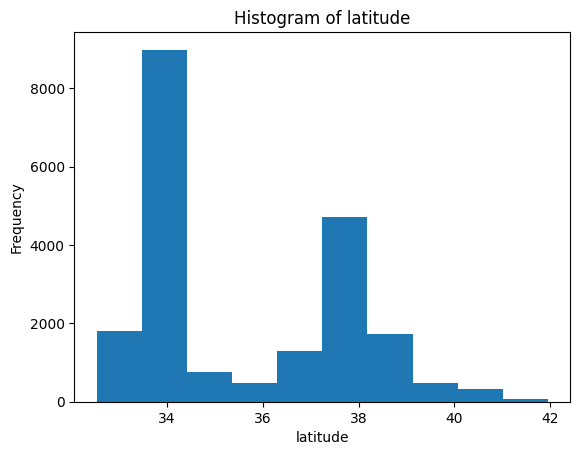

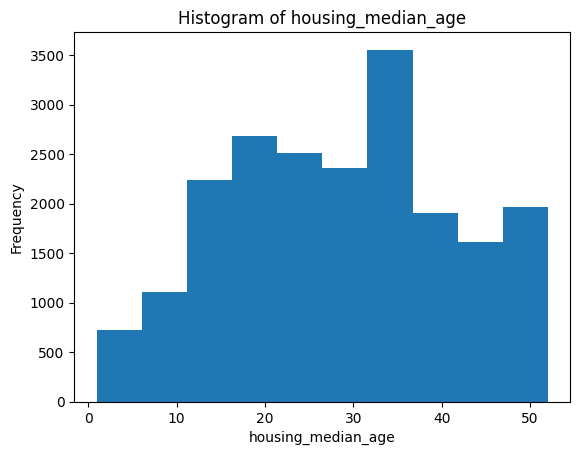

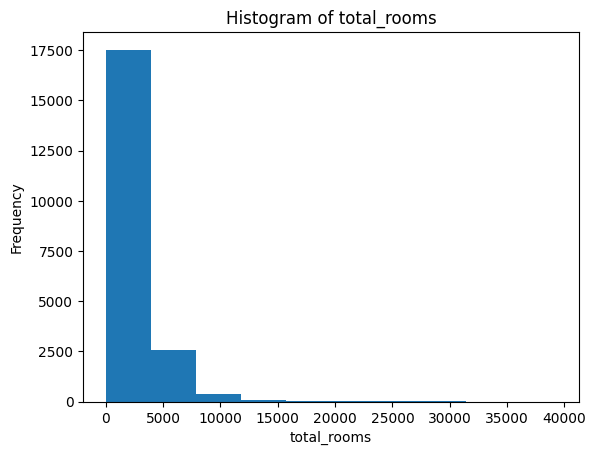

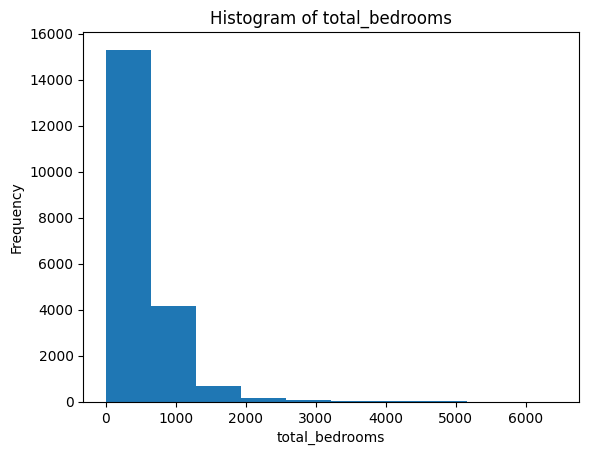

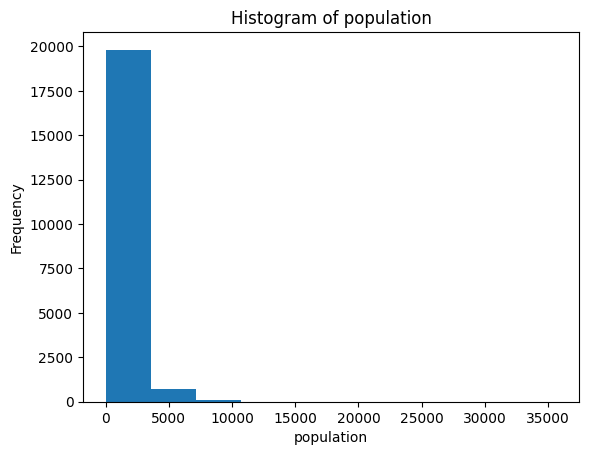

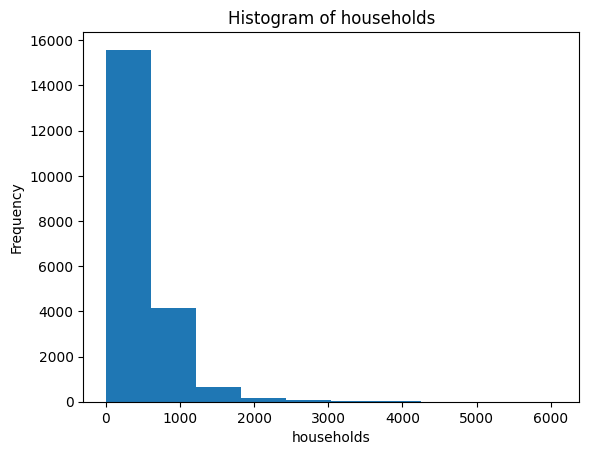

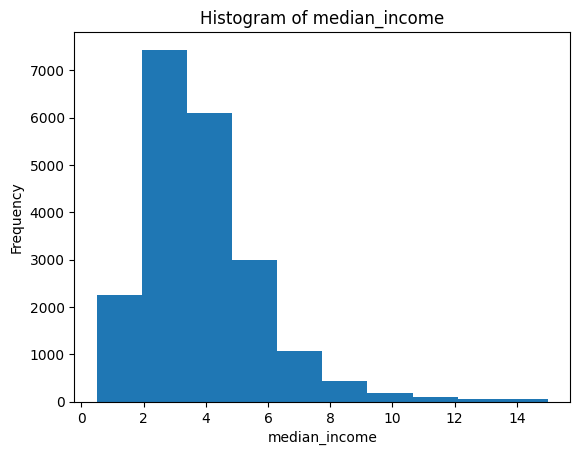

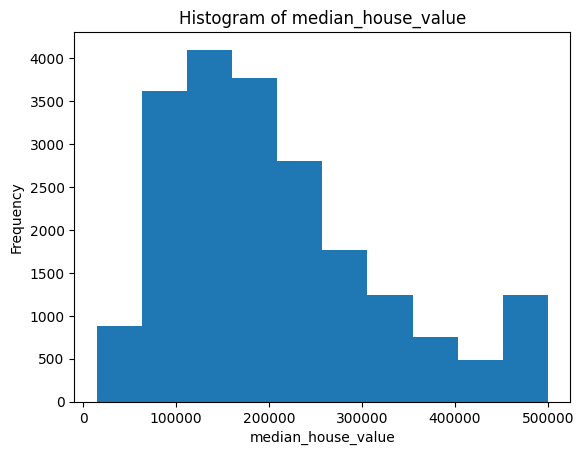

In [42]:
column_labels = df.columns.tolist()

# Select the columns for which you want to draw histograms
selected_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households','median_income',
                    'median_house_value']

# Plot histograms for the selected columns
for column in selected_columns:
    plt.hist(df[column])
    label = column_labels[df.columns.get_loc(column)]
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {label}')
    plt.show()

In [ ]:
#dropping ocean proximity because its non  numeric

In [52]:
new_df = df.drop(columns =['ocean_proximity'])


In [53]:
# using heatmaps to show correlation

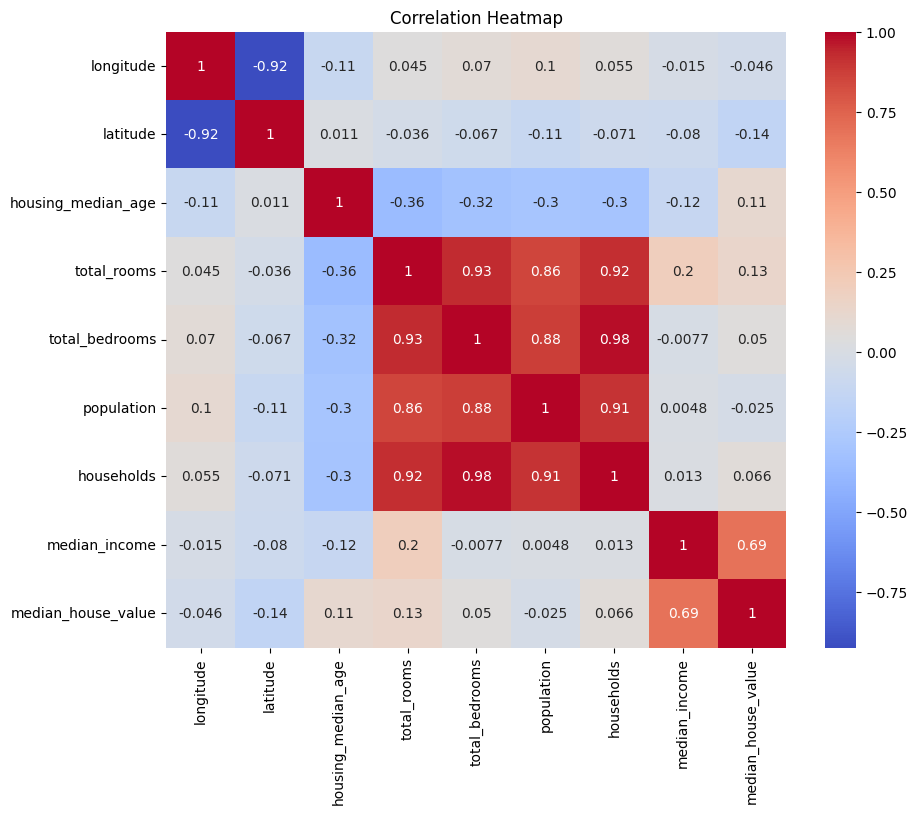

In [54]:

corr = new_df.corr() #correlation function
corr
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [58]:
from sklearn.impute import KNNImputer

# Create a temporary copy of the dataset without ocean proximity
new_df_temp = new_df.copy()

# Extract columns that have at least one missing value
new_column_list = [col for col in new_df_temp.columns if new_df_temp[col].isnull().any()]

# Update the dataframe
new_df_temp = new_df_temp[new_column_list]

# Apply KNNImputer to handle missing values
imputer = KNNImputer(n_neighbors=5)  # You can adjust the value of n_neighbors
new_df_temp_imputed = imputer.fit_transform(new_df_temp)


In [60]:
# Additionally we noted that several features (total_rooms, total_bedrooms, population, household: 789 active
# so it's interesting to find out if a removal of a few of them would have any affect on the model pe
# a new feature that is a ratio of the total rooms to households
housing_df [ 'rooms_per_household'] = housing_df [ 'total_rooms']/housing_df [ 'households']
#a new feature that is a ratio of the total bedrooms to the total rooms
housing_df [ 'bedrooms_per_room'] = housing_df [ 'total_bedrooms']/housing_df [ 'total_rooms' ]
#let's combine the latitude and longitude into 1
housing_df [ 'coords'] =
131 6,524 +
#a new feature that is a ratio of the population to the households
df [ 'population_per_household'] = df [ 'population']/housing_df [ 'households']
housing_df.info()
housing_df [ 'longitude']/housing_df [ 'latitude']

SyntaxError: invalid syntax (2352387491.py, line 8)